In [1]:
import math, numpy as np, matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

# Exercício 1: Descubra os seguintes polinômios de Taylor, plote e aproxime os seguintes valores:

## a) $f(x) = ⁷\sqrt{x}$, obter $P_1(x)$ (linear). Qual o gráfico e o valor de $⁷\sqrt{1.1}$ usando $P_1(x)$?
Utilizei a identidade matemática $⁷\sqrt{x} = x^{\frac{1}{7}}$ para calcular a derivada primeira.

In [ ]:
def f(x):
  return np.power(x, 1/7)

def f1(x):
  return 1 / np.power(7*x, 6/7)

def p1(x): # em torno de a = 1
  return f(1) + f1(1)*(x - 1)

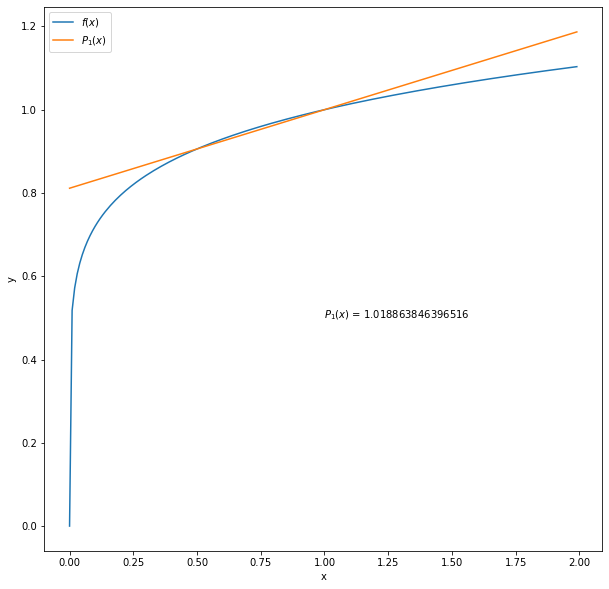

In [ ]:
x = np.arange(0, 2, 0.01)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, p1(x), label='$P_1(x)$')

plt.text(1, 0.5, '$P_1(x)$ = ' + str(p1(1.1)))

plt.legend()

plt.show()

## b) $f(x) = e^x$, obter $P_1(x)$ (quadrático). Qual o gráfico e o valor de $e^{0.2}$ usando $P_1(x)$?

In [ ]:
def g(x):
  return np.exp(x)

def g1(x):
  return np.exp(x)

def g2(x):
  return np.exp(x)

def p2(x): # em torno de a = 0
  return g(0) + g1(0)*(x) + g2(0)*(np.power(x, 2) / math.factorial(2))

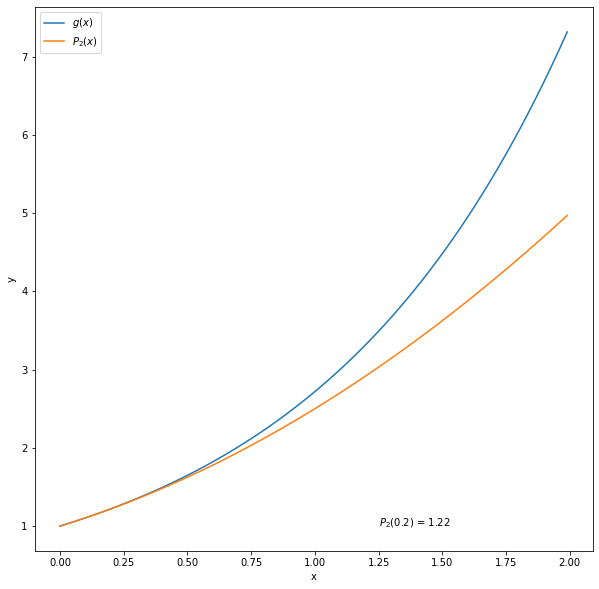

In [ ]:
x = np.arange(0, 2, 0.01)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, g(x), label='$g(x)$')
plt.plot(x, p2(x), label='$P_2(x)$')

plt.text(1.25, 1, '$P_2(0.2)$ = ' + str(p2(0.2)))

plt.legend()

plt.show()

# Exercício 2: Produza uma fórmula geral para o polinômio de Taylor expandido em torno de $a = 0$ de grau $n$, além disso, tomando $n = 20$ gere os gráficos dos polinômios obtidos.

## a) $\frac{1}{1 - x}$

Temos que $f(x) = \frac{1}{1 - x}$, sendo sua primeira derivada $f^{'}(x) = \frac{1}{(1 - x)^2}$, segunda derivada $f^{''}(x) = \frac{2}{(1 - x)^3}$ e derivada terceira $f^{'''}(x) = \frac{6}{(1 - x)^4}$. E assim por diante, mas vamos manter até aqui apenas.

Substituindo na fórmula do Polinômio de Taylor pelo ponto $a = 0$, ficará: \\
\begin{equation}
P_n(x) = f(a) + f^{'}(a)(x-a) + \frac{f^{''}(a)(x-a)^2}{2!} + \frac{f^{'''}(a)(x-a)^3}{3!} ... \\
P_n(x) = \frac{1}{1-0} + \frac{1(x-0)}{(1-0)^2} + \frac{2(x-0)^2}{2!(1-0)^3} + \frac{6(x-0)^3}{3!(1-0)^4} ... \\
P_n(x) = \frac{1}{1} + \frac{x}{1^2} + \frac{x^2}{1^3} + \frac{x^3}{1^4} ... \\
P_n(x) = \sum_{0}^{n}x^n
\end{equation}

In [ ]:
def p3(x, n):
  if n == 0:
    return np.power(x, n)
  else:
    return p3(x, n-1) + np.power(x, n)

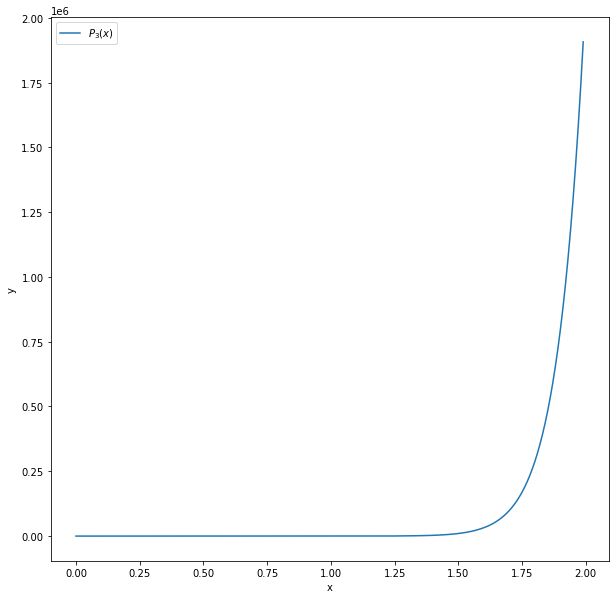

In [ ]:
x = np.arange(0, 2, 0.01)

plt.xlabel('x')
plt.ylabel('y')

plt.plot(x, p3(x, 20), label='$P_3(x)$')

plt.legend()

plt.show()

## b) $\sqrt{1+x}$

Temos que $f(x) = \sqrt{1+x}$, sendo sua primeira derivada $f^{'}(x) = \frac{1}{2\sqrt{x+1}}$ e segunda derivada $f^{''}(x) = \frac{-1}{4(x+1)^{3/2}}$. E assim por diante, mas vamos manter até aqui apenas. \\
Substituindo na fórmula do Polinômio de Taylor pelo ponto $a = 0$, ficará: \\
\begin{equation}
P_n(x) = f(a) + f^{'}(a)(x-a) + \frac{f^{''}(a)(x-a)^2}{2!} + \frac{f^{'''}(a)(x-a)^3}{3!} ... \\
P_n(x) = \sqrt{1+0} + \frac{1(x-0)}{2\sqrt{0+1}} - \frac{1(x-0)^2}{4(0+1)^{3/2}2!} ... \\
P_n(x) = 1 + \frac{x}{2} - \frac{x^2}{8} ...
\end{equation}

... isso vai gerar uma série muito estranha, sem padrão, não sei como resolve usando Taylor. Ou mesmo se tem solução.

# Encontre e plote os seguintes polinômios de Taylor, além disso calcule os  limitantes superiores de erro como se pede:

## a) Encontre um limitante superior para o erro ao aproximar $f(x) = e^x$, para $x ∈ [−1, 1]$, pelo polinômio de Taylor de grau 3 expandido em torno de $a = 0$. Calcule o erro absoluto de $P_3(x = 1)$ com $f(x = 1)$ e compare com o limitante obtido.

In [11]:
def f(x):
  return np.exp(x)

def f4(x):
  return np.exp(x)

def p3(x): # expandido em torno de a = 0
  return 1 + x + np.power(x, 2)/2. + np.power(x, 3)/6.

def r4(n, x, a):
  return (1/math.factorial(n+1)) * (x - a) * f4(x)

In [12]:
# Calculando o erro absoluto e comparando o limitante obtido

erro_abs = f(1) - p3(1)
limitante = r4(3, 1, 0)

erro_abs, limitante

(0.05161516179237857, 0.11326174285246021)

## b) Encontre o polinômio de Taylor de grau 2 para a função $f(x) = e^x sen(x)$ em torno do ponto $a = 0$. Determine um limitante superior do erro para  essa aproximação para $x ∈ [−π/4, π/4]$. Calcule o erro absoluto de $P_2(x = 0)$ com $f(x = 0)$ e compare com o limitante obtido.

In [19]:
def f(x):
  return np.exp(x) * math.sin(x)

def f3(x):
  return 2 * np.exp(x) * (math.cos(x) - math.sin(x))

def p2(x):
  return x + np.power(x, 2)

def r3(n, x, a):
  return (1/math.factorial(n+1)) * (x - a) * f3(a)

In [21]:
# Calculando o erro absoluto e comparando o limitante obtido

erro_abs = f(math.pi/4) - p3(math.pi/4)
limitante = r3(2, 0, math.pi/4)

erro_abs, limitante

(-0.6236856162017463, -6.374893663566581e-17)

# Encontre o polinômio de Taylor de 2a ordem, $P_2$ de $f(x,y) = e^{2x+3y}$ próximo a $(0, 0)$. Além disso, plote o polinômio obtido junto da função $f(x, y)$. Aproxime o valor de $(x,y)=(0.5, 0.1)$ e calcule o erro absoluto.

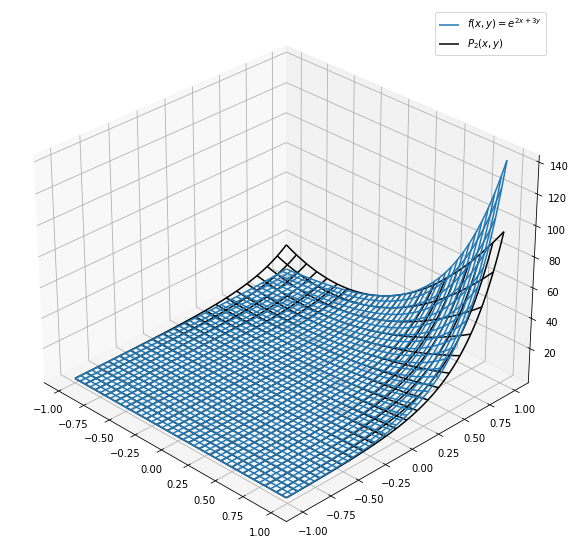

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

plt.rcParams['figure.figsize'] = [10, 10]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = np.arange(-1.0, 1.0, 0.01)
y = np.arange(-1.0, 1.0, 0.01)

x, y = np.meshgrid(x, y)

f = np.exp(2*x + 3*y)
p2 = np.exp(3*y) + 2*x*np.exp(3*y) + 2*np.power(x, 2)*np.exp(3*y)

#ax.plot_surface(x,y,f, cmap=cm.coolwarm,linewidth=0, antialiased=False)
#ax.plot_surface(x,y,p2, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.plot_wireframe(x, y, f, rstride=5, cstride=5, label='$f(x,y)=e^{2x+3y}$')
ax.plot_wireframe(x, y, p2, rstride=10, cstride=10,label='$P_2(x,y)$', color='black')
plt.legend()


#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, -45)
plt.savefig('taylor_rn.pdf')

plt.show()